# BUSINESS UNDERSTANDING

## Overview

This project aims to build a predictive model to identify customers at risk of leaving SyriaTel('churn'), so the company can act early and reduce revenue loss.
Churn means customers stopping their service soon and we're building a simple yes/no classifier to spot it early. 
The goal is to help the business reduce revenue loss by keeping more customers.

## Problem statement

SyriaTel, a telecommunication company is losing revenue when customers stop using its services (“churn”). Since retaining existing customers is more cost-effective than acquiring new ones, predicting churn early can help the company 
act with foresight by spotting customers who might leave, SyriaTel can create special plans to keep them and reduce revenue loss.

## Business Objective

The goal of this project is to find out why SyriaTel customers leave, predict which customers are likely to leave next, and provide actionable insights to help the company keep more customers and reduce revenue loss.

# DATA UNDERSTANDING

The dataset being used for in this project is from Kaggle. It consist of 21 columns and 3,333 rows. The dataset consist of float, integer and object
data types. 
The columns names are:
* state- "The state where the customer lives"
* account length- "How long (in days) the customer has had their account "                                                                                    
* area code- "The customer's phone area code"
* phone number- "Customer's phone number"
* international plan-"Whether the customer has an international calling plan ("Yes" & "No")"
* voice mail plan- "Whether the customer has a voicemail plan ("Yes" & "No")" 
* number vmail messages- ""The number of voicemail messages the customer has"
* total day minutes- "Total number of minutes customer spend on calls during the day" 
* total day calls- "Total number of calls the customer make during the day"
* total day charge- "How much the customer was charged for daytime calls"
* total eve minutes- "Total minutes customer spend on evening calls"
* total eve calls- "Total number of calls made by customer during the evening"
* total eve charge- "How much the customer was charged for evening calls"
* total night minute- "Total minutes the customer spend on night calls"
* total night calls- "Total night calls made by the customer"
* total night charge- "How much the customer was charged for night calls"
* total intl minutes- "Total minutes spent on international calls"
* total intl calls- "Total number of international calls made"
* total intl charge- "How much the customer was charged for international calls"
* customer service calls- "Number of times the customer called customer service"
* churn- "Whether the customer left the company or not ("True" & "False")"
* **The target column is churn**.
                                                                                         

# DATA PREPARATION

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Loading the data
df = pd.read_csv("bigml_59c28831336c6604c800002a.xls")
df.head(7)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


In [4]:
# checking the shape of dataset
df.shape

(3333, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [25]:
# Checking null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [26]:
# checking duplicates
df.duplicated().sum()

0

* There are no duplicate records.
* There are no missing values in the dataset.
* There are  21 columns and 3,333 rows in the dataset
* There are 4 object columns, 8 integer columns, 8 float columns and 1 bool column

## Exploratory Data Analysis(EDA)

In [27]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Univariate Analysis

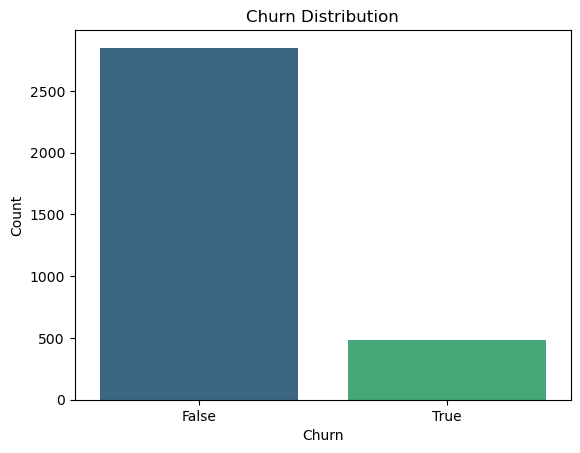

In [36]:
# Looking at churn column to understand its distribution and characteristic
churn_counts = df["churn"].value_counts()
sns.barplot( data=churn_counts, palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

* **The target variable "churn" is imbalanced with many "False" values compared to "True"**

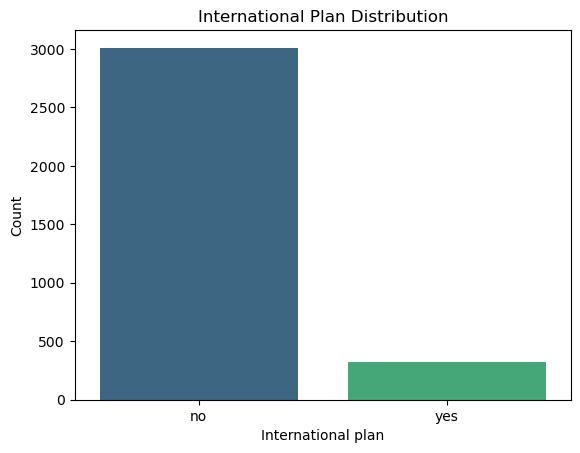

In [38]:
# Looking at international plan column to understand its distribution
international_plan_counts = df["international plan"].value_counts()
sns.barplot( data=international_plan_counts, palette='viridis')
plt.title("International Plan Distribution")
plt.xlabel("International plan")
plt.ylabel("Count")
plt.show()

* **There are many customers with a "no" international calling plan compared to "yes"**
* Churn is often higher for customers with international plans ("Yes")


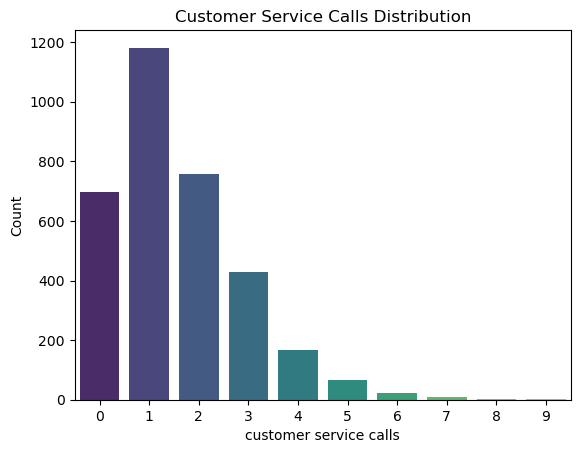

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


In [30]:
# Looking at voice mail plan column to understand its distribution
customer_service_calls_counts = df["customer service calls"].value_counts()
sns.barplot( customer_service_calls_counts, palette='viridis')
plt.title("Customer Service Calls Distribution")
plt.xlabel("customer service calls")
plt.ylabel("Count")
plt.show()
print(df["customer service calls"].describe())

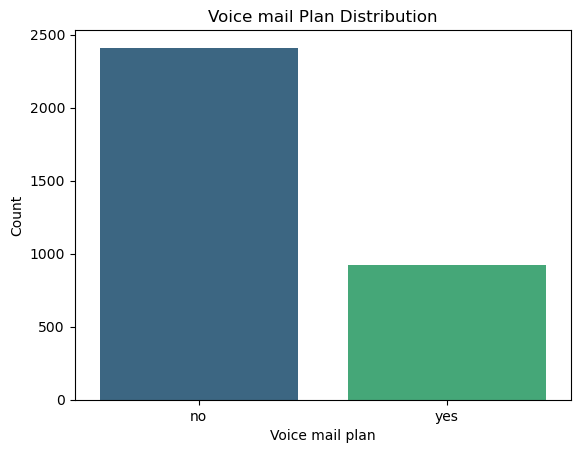

In [53]:
# Looking at voice mail plan column to understand its distribution
voice_mail_plan_counts = df["voice mail plan"].value_counts()
sns.barplot( data=voice_mail_plan_counts, palette='viridis')
plt.title("Voice mail Plan Distribution")
plt.xlabel("Voice mail plan")
plt.ylabel("Count")
plt.show()

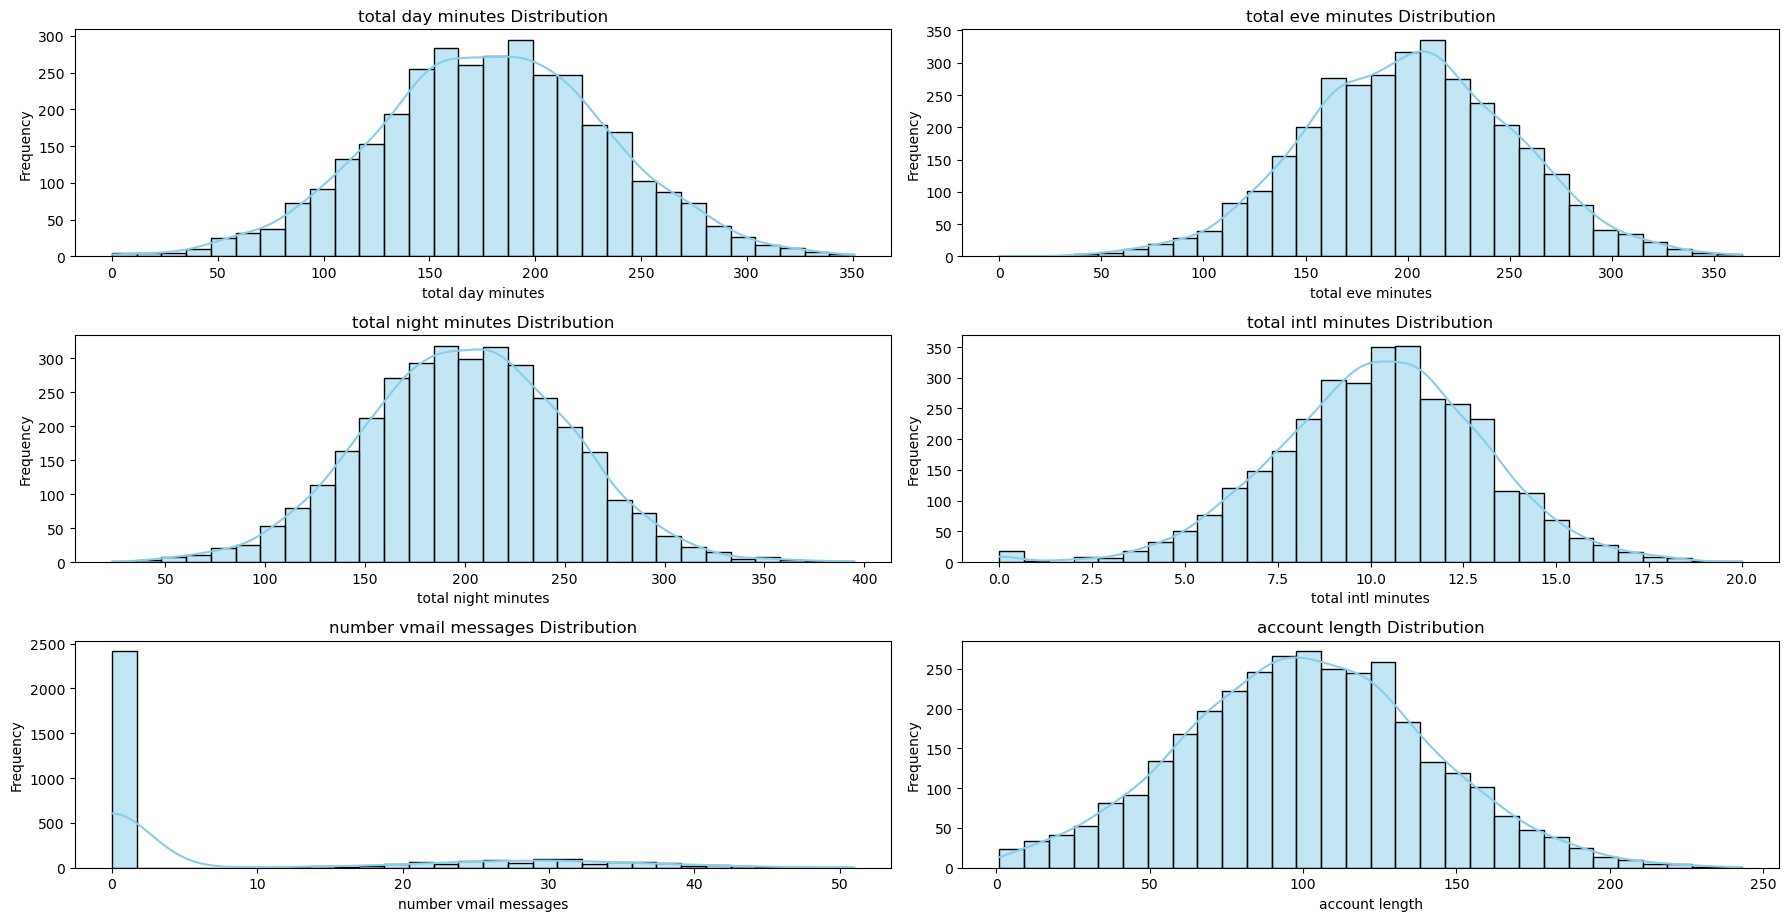

In [35]:
# visualize the distribution of numeric features
numeric_features = [
    'total day minutes',
    'total eve minutes',
    'total night minutes',
    'total intl minutes',
    'number vmail messages',
    'account length',
]

plt.figure(figsize=(18, 15))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[feature], bins=30, kde=True, color="skyblue")
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [10]:
df.corr(numeric_only=True)["churn"]

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

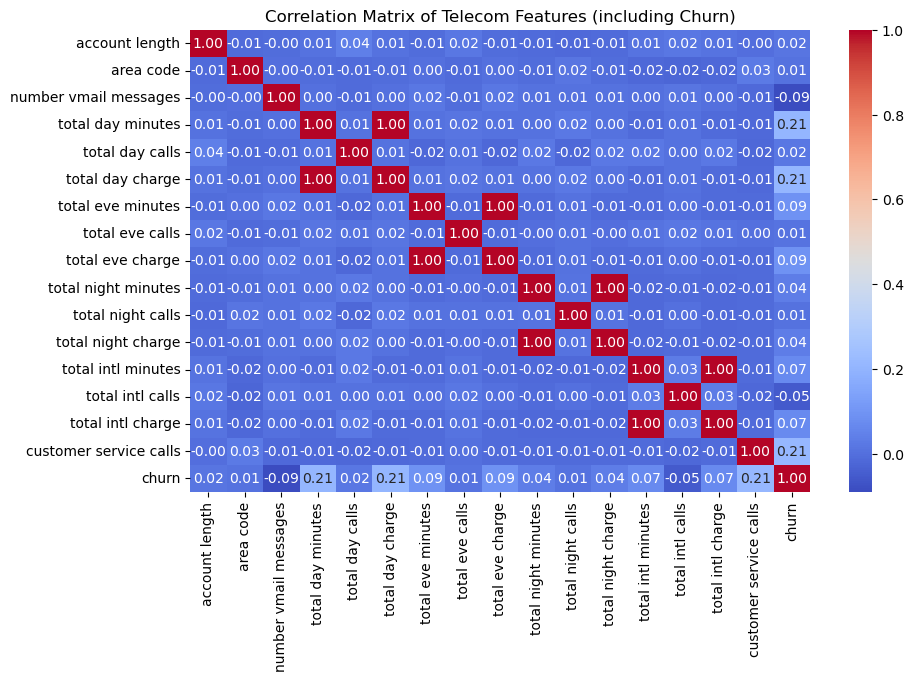

In [16]:
# Visualizing correlation with churn
# Making sure churn is numeric (0/1)
df['churn'] = df['churn'].astype(int)

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Telecom Features (including Churn)")
plt.show()


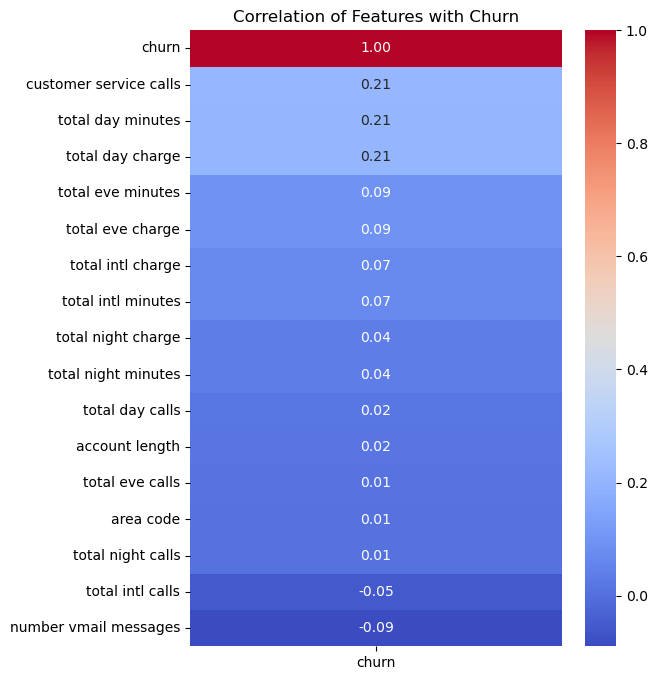

In [13]:
# Visualizing correlation with churn
plt.figure(figsize=(6, 8))
sns.heatmap(
    df.corr(numeric_only=True)[['churn']].sort_values(by='churn', ascending=False),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Correlation of Features with Churn")
plt.show()


**Inferences**
  
The features with the strongest positive correlation with churn are:
1. Customer service calls-0.21, meaning Customers who call customer service more often are more likely to churn.
2. Total day minutes-0.21, meaning customers who spend more minutes on calls during the day are more likely to churn.
3. Total day charge-0.21

Other features like (total eve minutes, total eve charge, total intl charge etc) have much lower correlations.



* To avoid causing multicollinearity we drop either Total day minutes or Total day charge because they carry almost the same information.

In [36]:
# dropping irrelevant columns
df=df.drop(columns= ["total day charge", "total eve charge", "total night charge", "total intl charge"])
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

In [43]:
# one hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [46]:
# Data splitting
X=df_encoded.drop("churn", axis=1)
y=df_encoded["churn"]

# Perfom a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# feature scaling

# Instantiate a scaler object
scaler=StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

In [48]:
# Handling class imbalance
# Checking the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0: 2280, 1: 386})


In [49]:
# Apply smote to handle class imbalance
smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0: 2280, 1: 2280})
